# Exploratory Data Analysis of Steam Reviews
***
As we've explored the data we have available in the Steam review dataset, we have increased our understanding of the available information and have updated our research questions accordingly:
 - Is there any correlation between receiving a game for free and the positivity of review?
 - How does word choice affect the number of comments on a review?
 - How does the length of review correlate to the score the Steam algorithm gave it and the number of upvotes?
 
*IMPORTANT: To run this notebook, you will need the `nltk` and `afinn` libraries installed. This is to enable the sentiment analysis we perform for the second research question. Please run the below commands:*  
`conda install -c anaconda nltk`  
`pip install afinn`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from scripts import project_functions

data = project_functions.load_and_process('..\data\data_raw\*.csv')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jaden\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jaden\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jaden\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### Comparing reviewers who paid vs. received the game for free
The following code explores the dataset by comparing paid users vs. free users. Paid users are defined as users who did not receive the game for free. Free users are defined as users who did receive the game for free. 

The following relationships are explored:
- Average Votes Up
- Average Steam Algorithm Score
- Average Votes Funny
- Average Review Length
- Average Playtime at Time of Review
- Average Total Playtime
- Average Playtime for the Last Two Weeks

In [2]:
import matplotlib
import missingno
import warnings

df = pd.DataFrame(data)

df = df[df['votes_funny'] <= '40000000'] 

free_users = df[df.received_for_free == "True"]
paid_users = df[df.received_for_free == "False"]

free_users_average_votes_up = free_users['votes_up'].astype(float).mean()
free_users_average_steam_algorithm_score = free_users['steam_algorithm_score'].astype(float).mean()
free_users_average_votes_funny = free_users['votes_funny'].astype(float).mean()
free_users_review_length = free_users['review'].str.len().mean()
free_users_average_playtime_at_review = free_users['playtime_at_review'].astype(float).mean()
free_users_average_playtime_forever = free_users['playtime_forever'].astype(float).mean()
free_users_average_playtime_last_two_weeks = free_users['playtime_last_two_weeks'].astype(float).mean()

paid_users_average_votes_up = paid_users['votes_up'].astype(float).mean()
paid_users_average_steam_algorithm_score = paid_users['steam_algorithm_score'].astype(float).mean()
paid_users_average_votes_funny = paid_users['votes_funny'].astype(float).mean()
paid_users_review_length = paid_users['review'].str.len().mean()
paid_users_average_playtime_at_review = paid_users['playtime_at_review'].astype(float).mean()
paid_users_average_playtime_forever = paid_users['playtime_forever'].astype(float).mean()
paid_users_average_playtime_last_two_weeks = paid_users['playtime_last_two_weeks'].astype(float).mean()

The following code is used to generate a bar graph comparing the **average votes up** for free users and paid users.

*Based on the results of the bar graph, we can see that reviews left by paid users have higher number of votes up on average than free users.*

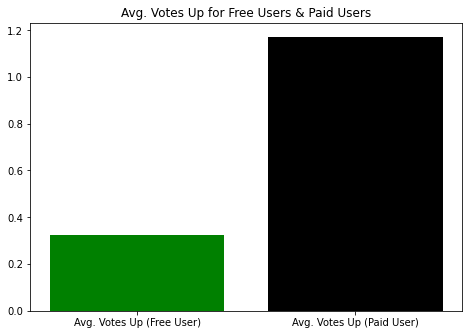

In [3]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
xvalues = ['Avg. Votes Up (Free User)', 'Avg. Votes Up (Paid User)']
yvalues = [free_users_average_votes_up, paid_users_average_votes_up]
ax.bar(xvalues, yvalues, color=['green', 'black'])
plt.title('Avg. Votes Up for Free Users & Paid Users')
plt.show()

The following code is used to generate a bar graph comparing the **average steam algorithm** score for free users and paid users.

*Based on the results of the bar graph we can see that reviews left by paid users have a higher steam algorithm score on average than free users.*

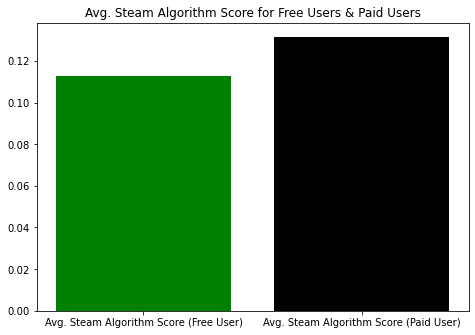

In [4]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
xvalues = ['Avg. Steam Algorithm Score (Free User)', 'Avg. Steam Algorithm Score (Paid User)']
yvalues = [free_users_average_steam_algorithm_score, paid_users_average_steam_algorithm_score]
plt.bar(xvalues, yvalues, color=['green','black'])
plt.title('Avg. Steam Algorithm Score for Free Users & Paid Users')
plt.show()

The following code is used to generate a bar graph comparing the **average votes funny** for free users and paid users.

*Based on the results of the bar graph we can see that reviews left by paid users have a higher number of votes funny on average than free users.*

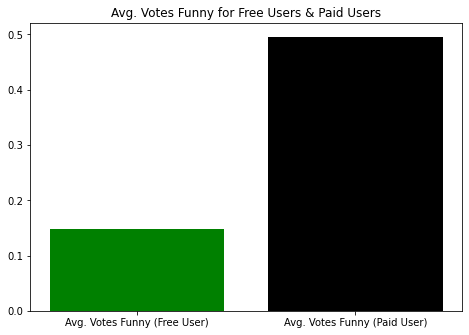

In [5]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
xvalues = ['Avg. Votes Funny (Free User)', 'Avg. Votes Funny (Paid User)']
yvalues = [free_users_average_votes_funny, paid_users_average_votes_funny]
plt.bar(xvalues, yvalues, color=['green','black'])
plt.title('Avg. Votes Funny for Free Users & Paid Users')
plt.show()

The following code is used to generate a bar graph comparing the **average length of review** for free users and paid users.

*Based on the results of the bar graph we can see that reviews left by paid users have longer review on average than free users.*

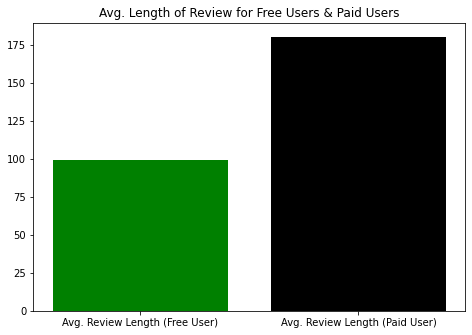

In [6]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
xvalues = ['Avg. Review Length (Free User)', 'Avg. Review Length (Paid User)']
yvalues = [free_users_review_length, paid_users_review_length]
plt.bar(xvalues, yvalues, color=['green','black'])
plt.title('Avg. Length of Review for Free Users & Paid Users')
plt.show()

The following code is used to generate a bar graph comparing the **average playtime at review** for free users and paid users.

*Based on the results of the bar graph we can see that paid users have a slightly lower average playtime at review when compared against free users.*

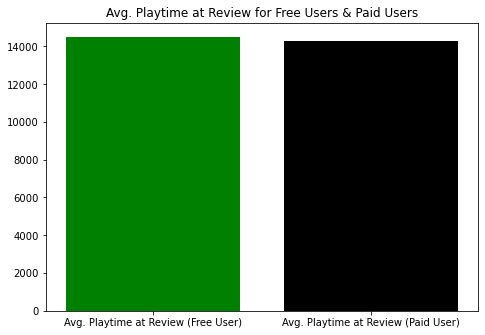

In [7]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
xvalues = ['Avg. Playtime at Review (Free User)', 'Avg. Playtime at Review (Paid User)']
yvalues = [free_users_average_playtime_at_review, paid_users_average_playtime_at_review]
plt.bar(xvalues, yvalues, color=['green','black'])
plt.title('Avg. Playtime at Review for Free Users & Paid Users')
plt.show()

The following code is used to generate a bar graph comparing the **average total playtime** for free users and paid users.

*Based on the results of the bar graph we can see that paid users have a slightly lower total playtime than free users.*

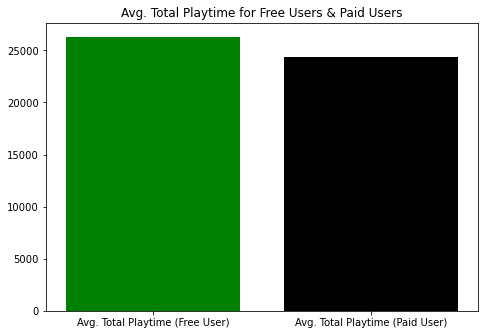

In [8]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
xvalues = ['Avg. Total Playtime (Free User)', 'Avg. Total Playtime (Paid User)']
yvalues = [free_users_average_playtime_forever, paid_users_average_playtime_forever]
plt.bar(xvalues, yvalues, color=['green','black'])
plt.title('Avg. Total Playtime for Free Users & Paid Users')
plt.show()

The following code is used to generate a bar graph comparing the **average playtime for the last two weeks** for free users and paid users.

*Based on the results of the bar graph we can see that paid users have a significanly lower average total playtime the last two weeks than free users.*

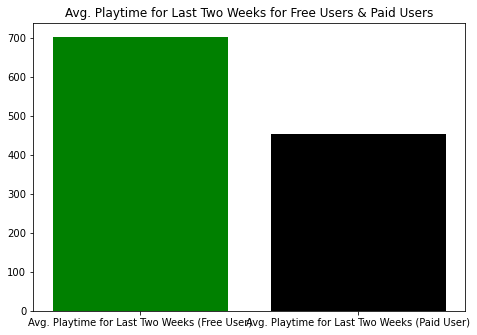

In [9]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
xvalues = ['Avg. Playtime for Last Two Weeks (Free User)', 'Avg. Playtime for Last Two Weeks (Paid User)']
yvalues = [free_users_average_playtime_last_two_weeks, paid_users_average_playtime_last_two_weeks]
plt.bar(xvalues, yvalues, color=['green','black'])
plt.title('Avg. Playtime for Last Two Weeks for Free Users & Paid Users')
plt.show()

Differences in the reviews between paid and free users is evident from the analysis of this experiment. We can see that reviews left by free users tend to have a slightly lower steam algorithm score and significantly lower votes up, votes funny and overall length of review than paid users. Paid users may be more inclined to leave a better review for the simple fact that paid users made the choice to purchase the game and are thus more emotionally invested in it than someone who had received it for free. The significant differences between the average votes up and length of review point to an overall difference in quality of review between the two groups of users. The final three bar charts show that the free users tend to have slightly higher average total playtime than paid user and a significantly higher average playtime for the last two weeks. One explanation for the difference in playtime for the last two weeks is that someone who has received the game for free may not be an avid gamer and thus does not have very many games to choose from. Someone who has paid for the game likely considers it to be a hobby worth spending money on and thus would be more likely to own a larger set of games, thus reducing the amount of time they spend on the reviewed game. Interestingly enough, there was not a very large difference in the amount of playtime at time of review (although free users had a slightly higher average playtime). This means that regardless of whether a user paid for or received a game for free, the amount of time spent playing a game before a review was submitted did not change significantly. 

### Comparing word choice to number of review comments
An interesting question that arose while conducting our exploratory dataset analysis was whether a reviewer's word choice would garner feedback from other reviewers. Such that, were there specific words that would target or trigger a certain response? Did a negative review get more comments than a positive one?

To do this, we compared the review words to the number of review comments. As we have a large dataset, we focused on analyzing the reviews with more than 50 feedback responses. Below is a plot showing the review words that had most comments:

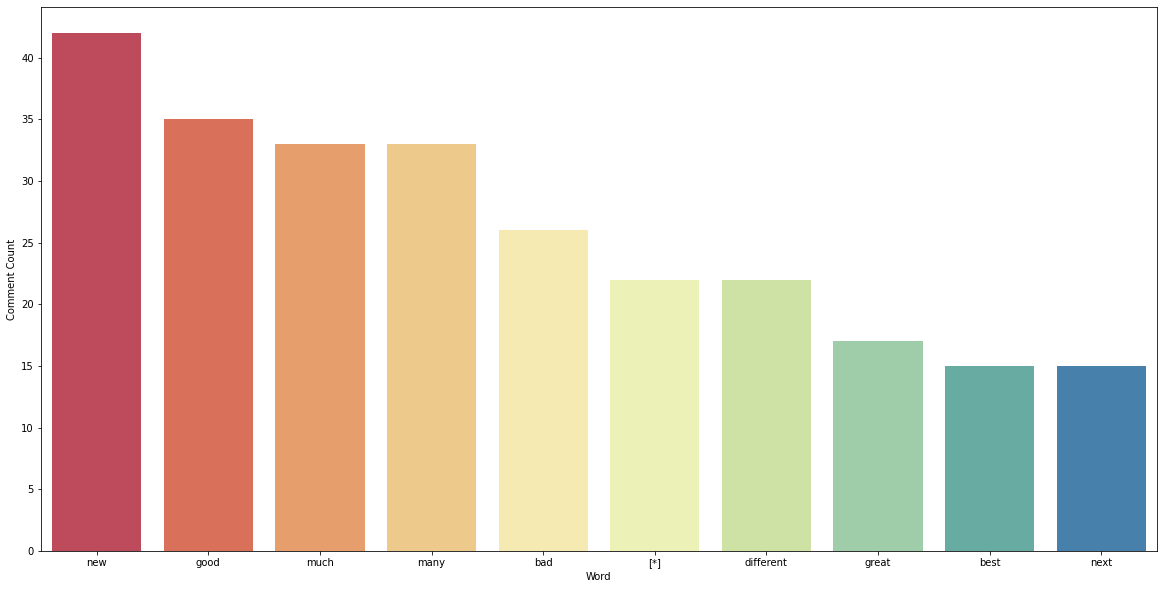

In [10]:
#Limiting data to only contain Review and Comment Count columns
rev_comments = data[['review', 'comment_count']]
df = pd.DataFrame({
    'Review': rev_comments['review'],
    'Comment Count': pd.to_numeric(rev_comments['comment_count'])
})

#Keeping only the reviews with more than 50 comments
over50 = df[df['Comment Count'] > 50]

from nltk.corpus import stopwords
from nltk import word_tokenize, pos_tag, pos_tag_sents
from collections import Counter

a = Counter(" ".join(over50["Review"].str.lower()).split()).most_common()
stop_words = set(stopwords.words('english'))

#Filtering out meaningless words using NLTK's stop_words list
b = [(i[0],i[1]) for i in a if i[0] not in stop_words]

#Creating dataframe containing words and their counts
word_counts = pd.DataFrame(b, columns=['Word','Count'])

#Further filtering to only contain adjectives
word_counts['POSTags'] = pos_tag_sents(word_counts['Word'].apply(word_tokenize).tolist())
word_counts['POSTags'] = word_counts['POSTags'].astype(str)
final = word_counts[word_counts['POSTags'].str.contains("JJ")].head(10)

plt.figure(figsize=(20,10))
plot = sns.barplot(x=final['Word'], y=final['Count'], palette="Spectral")
plot.set(xlabel='Word', ylabel='Comment Count')
plt.show()

As we can see, mostly positive word choices would gain more comments. This is interesting as one may think that negative reviews would gain **more** comments due to backlash from other users since we are analyzing the TOP games in each genre. But perhaps *because* these are top games, the ratio between positive and negative reviews is heavily unbalanced, thus the negative comments may get buried among all the positive reviews. 

Something else that we may need to take into consideration was that this analysis was based solely on individual words, which may skew the results of what we are aiming to know: the effect of the *positivity* or *negativity* of the review on comment count. 

What this means is that our analysis didn't take into the consideration of oxymorons like *amazingly awful, terribly good, etc.* in the reviews, which could affect the answer to our research question as now the meaning of the review has changed. Based on one of our exploratory data analyses, many of the reviews contained less than 10 characters, indicating most reviews would be **straightfoward and concise**. Thus, it was safe to assume that not many reviews would contain figures of speech like oxymorons.

However, it would still be good to compare it to the reviews' overall affinity score.

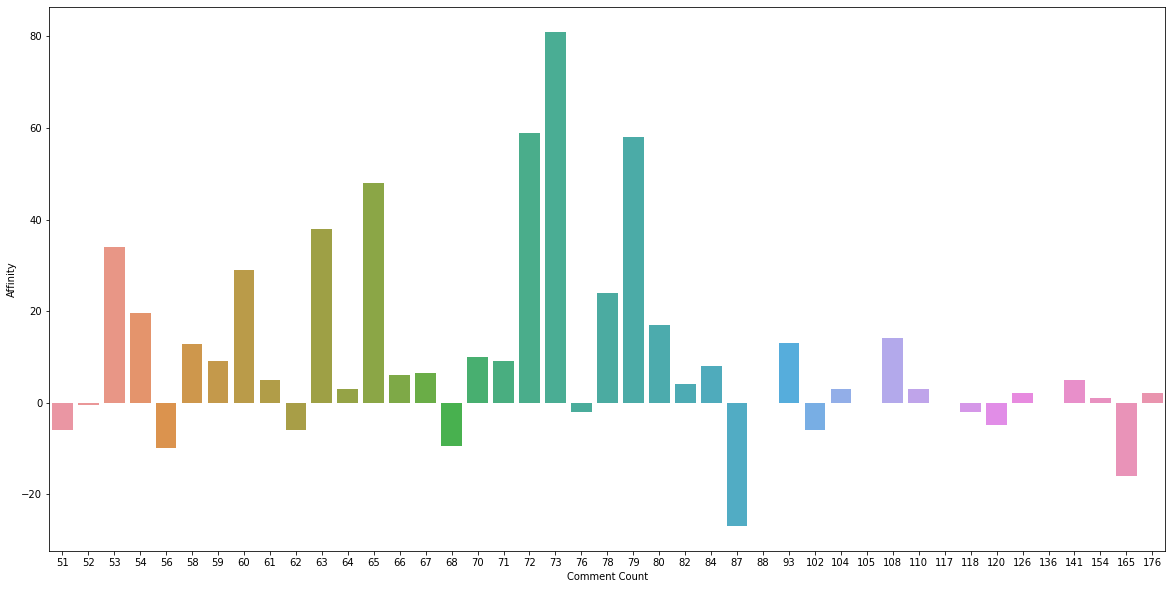

In [11]:
from afinn import Afinn
afinn = Afinn(language='en')

a_over50 = over50.copy()
a_over50['Affinity'] = a_over50['Review'].apply(afinn.score)

plt.figure(figsize=(20,10))
aplot = sns.barplot(x=a_over50['Comment Count'], y=a_over50['Affinity'], ci=None)
plt.show()

*This graph shows the distribution of all the reviews with more than 50 comments and its affinity score. The affinity score is calculated based on the average of the review's words sentiment score - negative words have a negative score, positive words have a positive score, and neutral words have a score of zero.*

Once again, we see that most reviews have a positive affinity score and make up for a large majority of comment counts. In addition, notice that the review with the second highest number of comments has an affinity score of approximately -15.0. This shows that our hypothesis (that negative reviews garner attention) is somewhat correct.

What is even more interesting is that reviews with more than 100 comments, generally have a low (but positive) affinity score, with the highest score being approximately 10.0. Suprisingly, the highest number of comments has the second lowest positive affinity score, which is interesting to see as this means the review was positive but relatively neutral. This brings us to wonder, why did this review received so much user feedback?

In [12]:
top_review = over50[over50['Comment Count'] == 176]
with pd.option_context('display.max_colwidth', None, 'display.colheader_justify','left'):
    display(top_review.style.hide_index()
            .hide_columns(['Comment Count'])
            .set_properties(**{'text-align': 'left'})
            .set_table_styles([dict(selector = 'th', props=[('text-align', 'left')])]))

Review
"This game saved my life. I am 27. My ex-wife and I have a daughter together, and adopted our son together. They are now both 4 years old. When we were going through our separation, I found myself lost and miserable. I was self destructive. I got so mad one day from everything spiraling out of my control that I punched some concrete in a moment of overwhelming emotion. That caused me to break my 5th metacarpal in my right hand... my working hand... my games hand.. the hand that I held and carried my children to bed with.. The hand I desperately needed to make sure I could continue to provide. After learning of the severity of my self-inflicted damage, I was borderline suicidal. Keep in mind that just a few months before this, I was the happiest man with no history of depression or anxiety. I have never had fits of rage, or been one to break down and cry, but I was in a low spot that just really buried me from being able to see the light on the other side. Having nothing better to do, I searched for a game I could play, ONE HANDED while I recovered. I somehow stumbled upon this game and read some of the reviews. I decided that it had to be worth a shot... I must admit, I didn't beat the game, or play nearly as long as some of you. In fact, I may have only played this game a day or two.. With that being said, after doing so, I had a new found joy and hope for life. I was able to put behind me the pain and suffering that had been cast over me. I was able to experience other peoples joy and happiness. I was able to see the fruits of my ""labor"". I relaxed for 5 fucking minutes to this music long enough to realize that I was going to be okay. After coming to that realization, I turned the game off, and I went back to work. It hurt my hand like hell but I was motivated. I stopped feeling so damn sorry for myself, and I became the father I needed to be in that moment, not the weak boy I was behaving as. Today, I am close friend with my kids mother. We don't fight, or argue, or say hurtful things to each other. We are parents, and friends. I now have 3 kids. My third child is, wait for it, ALSO 4 YEARS OLD. The woman I am with was going through a very similar situation at the time of my own separation, and we just stumbled in to each others life unexpectedly. We have been in a relationship for a year now, and are very happy together. Moral of the story, you never know what life holds in store for you, and if I would have given up when all the odds were stacked against me, I wouldn't be where I am today. This silly little game helped me realize that. Thank you ~EDIT~ A lot of people were upset I didn't share the things I enjoyed about the game in detail. Below you will find my personal experience in the short amount of time I spent playing. I spent most of my time fighting slimes with a sword and mining the ore in the dungeon.. haha, but I also made some money off plants. I didn't spend much time getting to know the townsfolk. I got irritated that weeds kept growing in my garden, but I kept plucking them and it was sort of rewarding to keep my map weed free. That's about all I can say other than digging up treasures that would show up in the dirt. I had just planted some plant that cost me like 1000 gold, and I built a water irrigation system around that, and my other plants. It was struck by lightning shortly after... lol, my best friend actually played for several hours with me which was unexpected, and since we shared gold he and I kept screwing each other over for fun. I just saw an update that may be fixing that ""issue"" however, and either way I intend to pick up the game again and play it much more in depth when my winter season comes and work slows down. My 20 hours of enjoyment."


What we find out is that the top commented review happens to be a very touching story of a man who was going through a tough experience that found new joy in his life after discovering a game. Unfortunately, we do not have the data containing the comment responses; however, judging from the bottom portion of the review, it seems that most of the comments were words of congratulations, questions, or critiques that the review was not focused on the gaming experience.

From this, it makes more sense as to why the comment rate was so high and the affinity score was so low - rather than about the game, the reviewer talked mostly about his difficult life situation causing the affinity score to decrease significantly as it contained words such as destructive, hurtful, etc. which have very low sentimental scores.

Overall, this analysis between the number of comments and the reviews' word choice and affinity score showed some very interesting results. And from this, we see there is some correlation between the positivity of the review and the amount of other user feedback, such that generally with top rated games, positive reviews garner more attention as others are able to relate to the reviewer, whether that may be from life experience or in-game experience.

### Comparing review length to Steam algorithm score and upvotes
One interesting aspect of this dataset is the inclusion of Steam's algorithm score, used to determine the visibility priority of the review in Steam's review pages. We wanted to explore how the length of a review correlates to scoring in Steam's algorithm, and constrast that complex calculated score to a simple count of upvotes.

The below plots compare the Steam Algorithm Score to the Review Length:

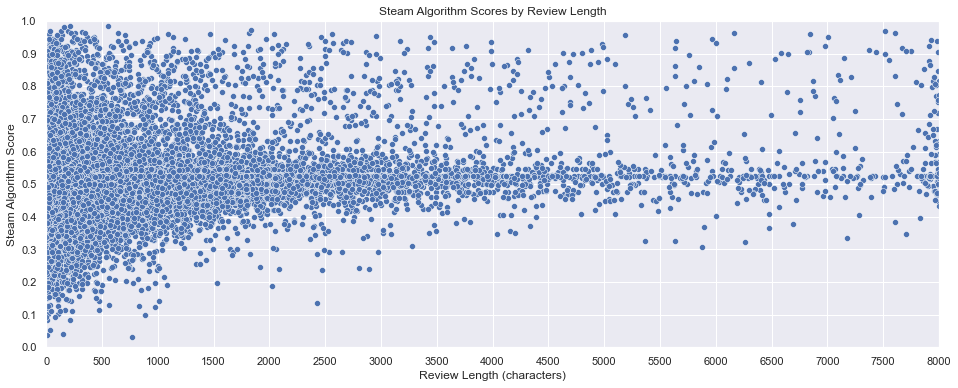

In [13]:
# clear out meaningless algorithm scores (with a value of 0)
sample = data[data.steam_algorithm_score != '0']
sns.set(rc={'figure.figsize':(16,6)})

review_lengths = sample['review'].apply(lambda x: len(str(x)))
algorithm_scores = sample['steam_algorithm_score'].apply(lambda x: float(x))

ax = sns.scatterplot(x=review_lengths, y=algorithm_scores)
ax.set(xlabel='Review Length (characters)', ylabel='Steam Algorithm Score', title='Steam Algorithm Scores by Review Length')
plt.xlim(0, 8000)
plt.ylim(0, 1)
plt.xticks(np.arange(0, 8001, 500))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

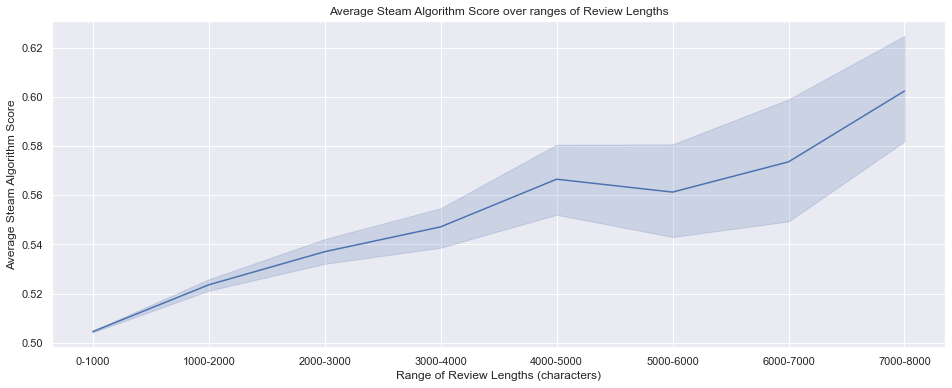

In [14]:
# clear out meaningless algorithm scores (with a value of 0)
sample = data[data['steam_algorithm_score'] != '0'][['review','steam_algorithm_score']]
sample['review_length'] = sample['review'].apply(lambda x: len(str(x)))
sample['steam_algorithm_score'] = sample['steam_algorithm_score'].apply(lambda x: float(x))
sample = sample.drop(columns='review')

sample['review_length_bins'] = pd.cut(sample['review_length'], bins=np.arange(0, 8001, 1000), labels=np.arange(0, 8000, 1000))
sample['review_length_bins'] = sample['review_length_bins'].apply(lambda x: str(x) + '-' + str(int(x) + 1000))

ax = sns.lineplot(x='review_length_bins', y='steam_algorithm_score', data=sample)
ax.set(xlabel='Range of Review Lengths (characters)', ylabel='Average Steam Algorithm Score', title='Average Steam Algorithm Score over ranges of Review Lengths')
plt.show()

While there's a LOT of data here, some things are visually apparent. For one, you may have noticed a *slight* trend toward middle values for the algorithm score - this is a trend we observed in exploratory analysis of this dataset as well. It seems that, for the majority of reviews, no matter what length you make it, chances are it'll score an average value.

This isn't surprising. Steam's algorithm computes a score based on many factors, and the vast majority of reviews receive almost no attention to fuel this computation, as shown in the below graph:

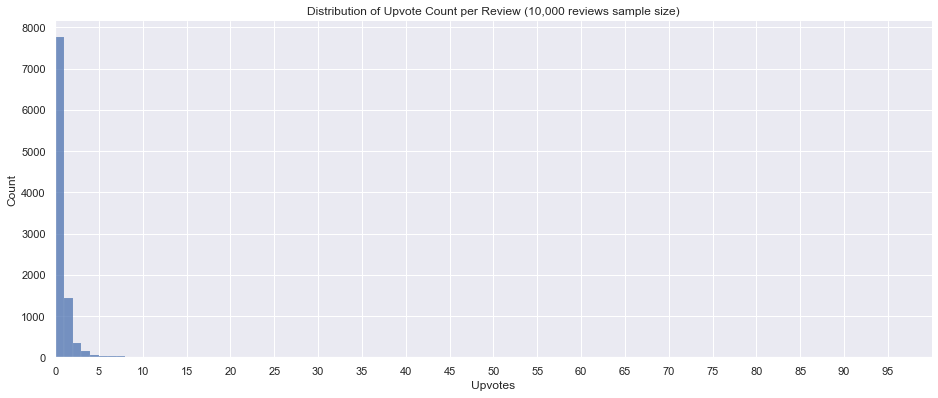

In [15]:
upvotes = data['votes_up'].astype(int).sample(10000).sort_values()

ax = sns.displot(upvotes, binwidth=1, height=5.5, aspect=2.4)
ax.set(xlabel='Upvotes', ylabel='Count', title='Distribution of Upvote Count per Review (10,000 reviews sample size)')
plt.xlim(0, 100)
plt.xticks(np.arange(0, 100, 5))
plt.show()

*As we can see, most reviews don't receive a single upvote. So, we should expect that the majority of algorithm scores are placed firmly around the middle mark, given the lack of data available to evaluate them.*

But let's take another look at that original distribution. We know that shorter reviews are significantly more common (in fact, we found that the 10 most common reviews are all under 10 characters long!), and we can see the results of this in the first graph, with the plot density decreasing substantially as we look to the right.

Interestingly, despite the infrequency of long reviews, we see a consistent sprinkling of highly-scored reviews throughout the entire graph. In contrast, scores below 0.3 are virtually unheard of past the 3000 character mark. **This means that longer reviews have a proportionately much higher chance of being well-rated by Steam's algorithm compared to short ones.** This conclusion is further backed by the second graph, which shows the average score over ranges of review lengths. As we can see, the average score increases by a whopping 0.1 based on review length alone.

This correlation is most likely due largely in part to the quality of longer reviews on average. The longest reviews are typically in-depth analyses or curated reviews, which generally receive much more attention than the average review, and therefore a higher algorithm score. Fascinating!

Let's compare these results to the correlations between upvotes and review length:

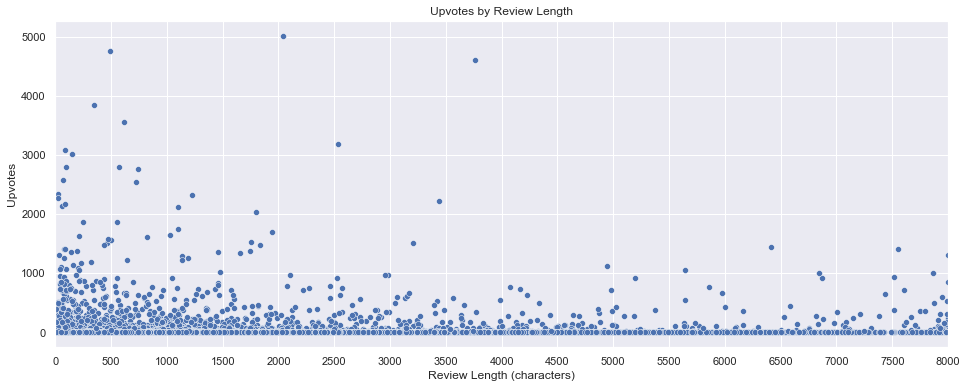

In [16]:
review_lengths = data['review'].apply(lambda x: len(str(x)))
votes_up = data['votes_up'].apply(lambda x: int(x))

ax = sns.scatterplot(x=review_lengths, y=votes_up)
ax.set(xlabel='Review Length (characters)', ylabel='Upvotes', title='Upvotes by Review Length')
plt.xlim(0, 8000)
plt.xticks(np.arange(0, 8001, 500))
plt.show()

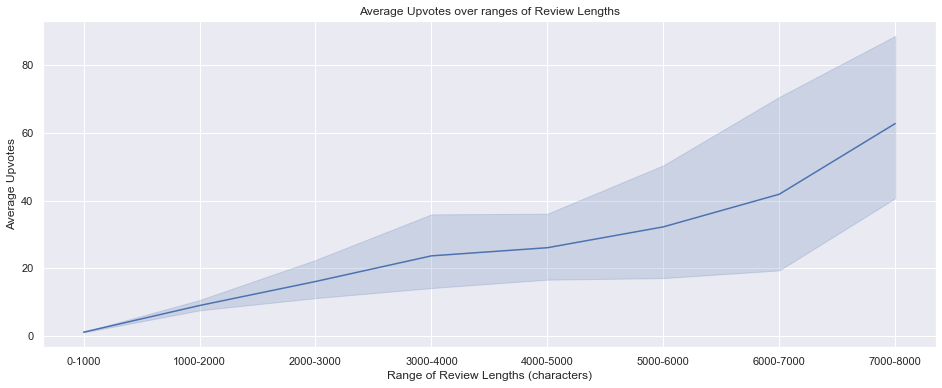

In [17]:
# clear out meaningless algorithm scores (with a value of 0)
sample = data.loc[:, ['review','votes_up']]
sample['review_length'] = sample['review'].apply(lambda x: len(str(x)))
sample['votes_up'] = sample['votes_up'].apply(lambda x: int(x))
sample = sample.drop(columns='review')

sample['review_length_bins'] = pd.cut(sample['review_length'], bins=np.arange(0, 8001, 1000), labels=np.arange(0, 8000, 1000))
sample['review_length_bins'] = sample['review_length_bins'].apply(lambda x: str(x) + '-' + str(int(x) + 1000))

ax = sns.lineplot(x='review_length_bins', y='votes_up', data=sample)
ax.set(xlabel='Range of Review Lengths (characters)', ylabel='Average Upvotes', title='Average Upvotes over ranges of Review Lengths')
plt.show()

The very first thing we should notice about this data is that there is practically a solid line of data points at the 0 mark for Upvotes across the entire graph. As shown earlier, most reviews don't receive a single upvote - so these results match up.

Overall, we see very similar patterns here to what we saw in the Steam Algorithm Score plots. In fact, upvotes show an even stronger correlation with review length than the algorithm score did! The second plot shows a **mind-bending average of over 60 upvotes for the longest reviews!**

\~\~\~

Reflecting on the results of these two review length analyses, it appears that review length correlates highly with both the popularity and Steam scoring of reviews. While this correlation in itself is not surprising, we were amazed at the sheer magnitude of influence that the length of review had on the success of a review! Clearly, it's worth taking the time to write out your reviews in exquisite detail if you want them to have a good chance at being seen and upvoted.